# Projekt 1 – perceptron Rosenblatta

## Temat: płytka sieć do nauki problemu XOR

### To do:
* Krótki opis problemu - eze
* Opis zaimplementowanych funkcji - eze
* Opis zaimplementowanych zmiennych i stałych - eze
* Wykresy błędu MSE (błędu średniokwadratowego) w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym) - nie jestem pewien o co chodzi z "w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym)"
* wykresy błędu klasyfikacji (przyjmujemy próg 0.5 dla klasyfikacji 0-1) - okej troche mi się nie chce
* wykresy wag w obu warstwach. - okej troche mi się nie chce

### To do - jak wystarczy czasu - pewnie nie wystarczy:
* szybsze kończenie uczenia przy spadku MSE poniżej zadanej wartości,
* dodanie momentum,
* adaptacyjny współczynnik uczenia,
* dodanie mini-batch.

In [3]:
import numpy as np
#import pandas as pd
from matplotlib import pyplot as plt

In [4]:
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

In [5]:
np.random.seed(0)

In [6]:
# generate data
def data_generator(random = False, multiply_by = 1, shuffle = True):
    if random:
        X = np.random.binomial(1, 0.5, (4*multiply_by, 2))
        Y = np.array([[X[i][0] ^ X[i][1]] for i in range(0,X.shape[0])])
    else:
        X = np.array([[0,0],[0,1],[1,0],[1,1]])
        Y = np.array([[0],[1],[1],[0]])
        X = np.tile(X, (multiply_by, 1))
        Y = np.tile(Y, (multiply_by, 1))
        
    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        Y = Y[indices]
    return X, Y

In [7]:
# activation function
def sigmoid(x): 
	return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x): 
    return x * (1 - x)

In [13]:
# weights and biases initialization
def initialize_params():
    # output layer weights and biases
    W1 = np.random.rand(inputLayerNeurons, hiddenLayerNeurons) - 0.5
    b1 = np.random.rand(1, hiddenLayerNeurons) - 0.5
    # hidden layer weights and biases
    W2 = np.random.rand(hiddenLayerNeurons, outputLayerNeurons) - 0.5
    b2 = np.random.rand(1, outputLayerNeurons) - 0.5
    return W1, b1, W2, b2

In [14]:
def forward_prop(W1, b1, W2, b2, X):
    # 1. layer
    Z1 = np.dot(X,W1) + b1
    A1 = sigmoid(Z1)
    
    # 2. layer
    Z2 = np.dot(A1,W2) + b2
    A2 = sigmoid(Z2)
    
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): 
    # 2. layer
    dA2 = Y - A2 # Error
    Err = 1/2*(Y - A2) ** 2
    dZ2 = dA2 * sigmoid_prime(A2)
    
    # 1. layer
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * sigmoid_prime(A1) 
    
    return dZ1, dZ2, dA2, Err

def update_params(W1, b1, W2, b2, dZ1, dZ2, X, A1, lr):
    # 1. layer
    W1 = W1 + lr * X.T.dot(dZ1)
    b1 = b1 + lr * np.sum(dZ1,axis=0,keepdims=True) * lr   
    
    # 2. layer 
    W2 = W2 + lr * A1.T.dot(dZ2)  
    b2 = b2 + lr * np.sum(dZ2,axis=0,keepdims=True) * lr    
    
    return W1, b1, W2, b2


In [31]:
# def get_predictions(A2):
### TO DO

# def get_accuracy(predictions, Y):
### TO DO

def gradient_descent(X, Y, lr, iterations, logs = True):
    W1, b1, W2, b2 = initialize_params()
    Error = []
    #print(X)
    #print(Y)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dZ1, dZ2, dA2, Err = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dZ1, dZ2, X, A1, lr)
        Error.append(np.mean(Err))
        if i % 1000 == 0 and logs:
            print("Iteration: ", i)
            print(A2.T)
            print(Y.T)
    print("Final Predictions")
    print(A2.T)
    print(Y.T)
    return W1, b1, W2, b2, Error

In [51]:
X, Y = data_generator(random = False, multiply_by = 1, shuffle = False)

W1, b1, W2, b2, Error = gradient_descent(X, Y, 0.2, 30000, logs = False)
_,_,_, retrun = forward_prop(W1, b1, W2, b2,[[0,0],[0,1],[1,0],[1,1]])
print(retrun)
print(Error)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]
Final Predictions
[[0.01482694 0.98357457 0.49969023 0.50063164]]
[[0 1 1 0]]
[[0.01482662]
 [0.98357493]
 [0.49969024]
 [0.50063162]]
[0.12722941749278227, 0.12701496918244243, 0.12681949162342254, 0.1266414136106712, 0.12647927526140398, 0.12633172343527338, 0.12619750669629837, 0.12607546997984348, 0.1259645490997545, 0.1258637652056833, 0.12577221927865145, 0.12568908673388846, 0.12561361218374434, 0.12554510439977348, 0.1254829315016591, 0.1254265163912362, 0.12537533244220883, 0.1253288994500152, 0.12528677984143863, 0.12524857513979842, 0.1252139226787039, 0.12518249255525626, 0.1251539848121053, 0.12512812683679198, 0.12510467096623704, 0.12508339228398002, 0.12506408659777357, 0.12504656858532306, 0.12503067009629598, 0.1250162385991618, 0.12500313576193178, 0.12499123615642826, 0.12498042607629556, 0.12497060245956351, 0.12496167190716966, 0.12495354978943463, 0.12494615943305257, 0.12493943138170985, 0.12493330272396588, 0.12

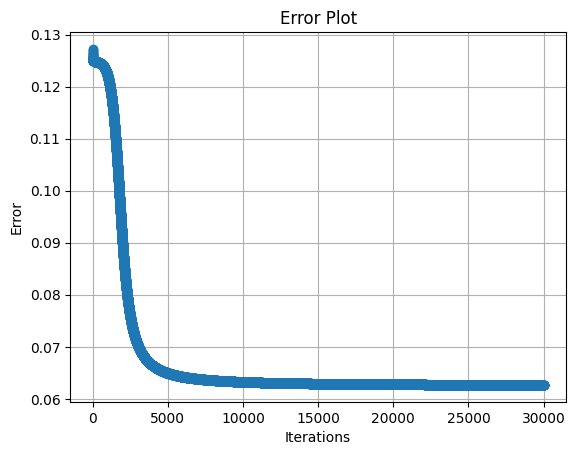

In [52]:
# Plotting the errors
plt.plot(Error, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error Plot')
plt.grid(True)
plt.show()